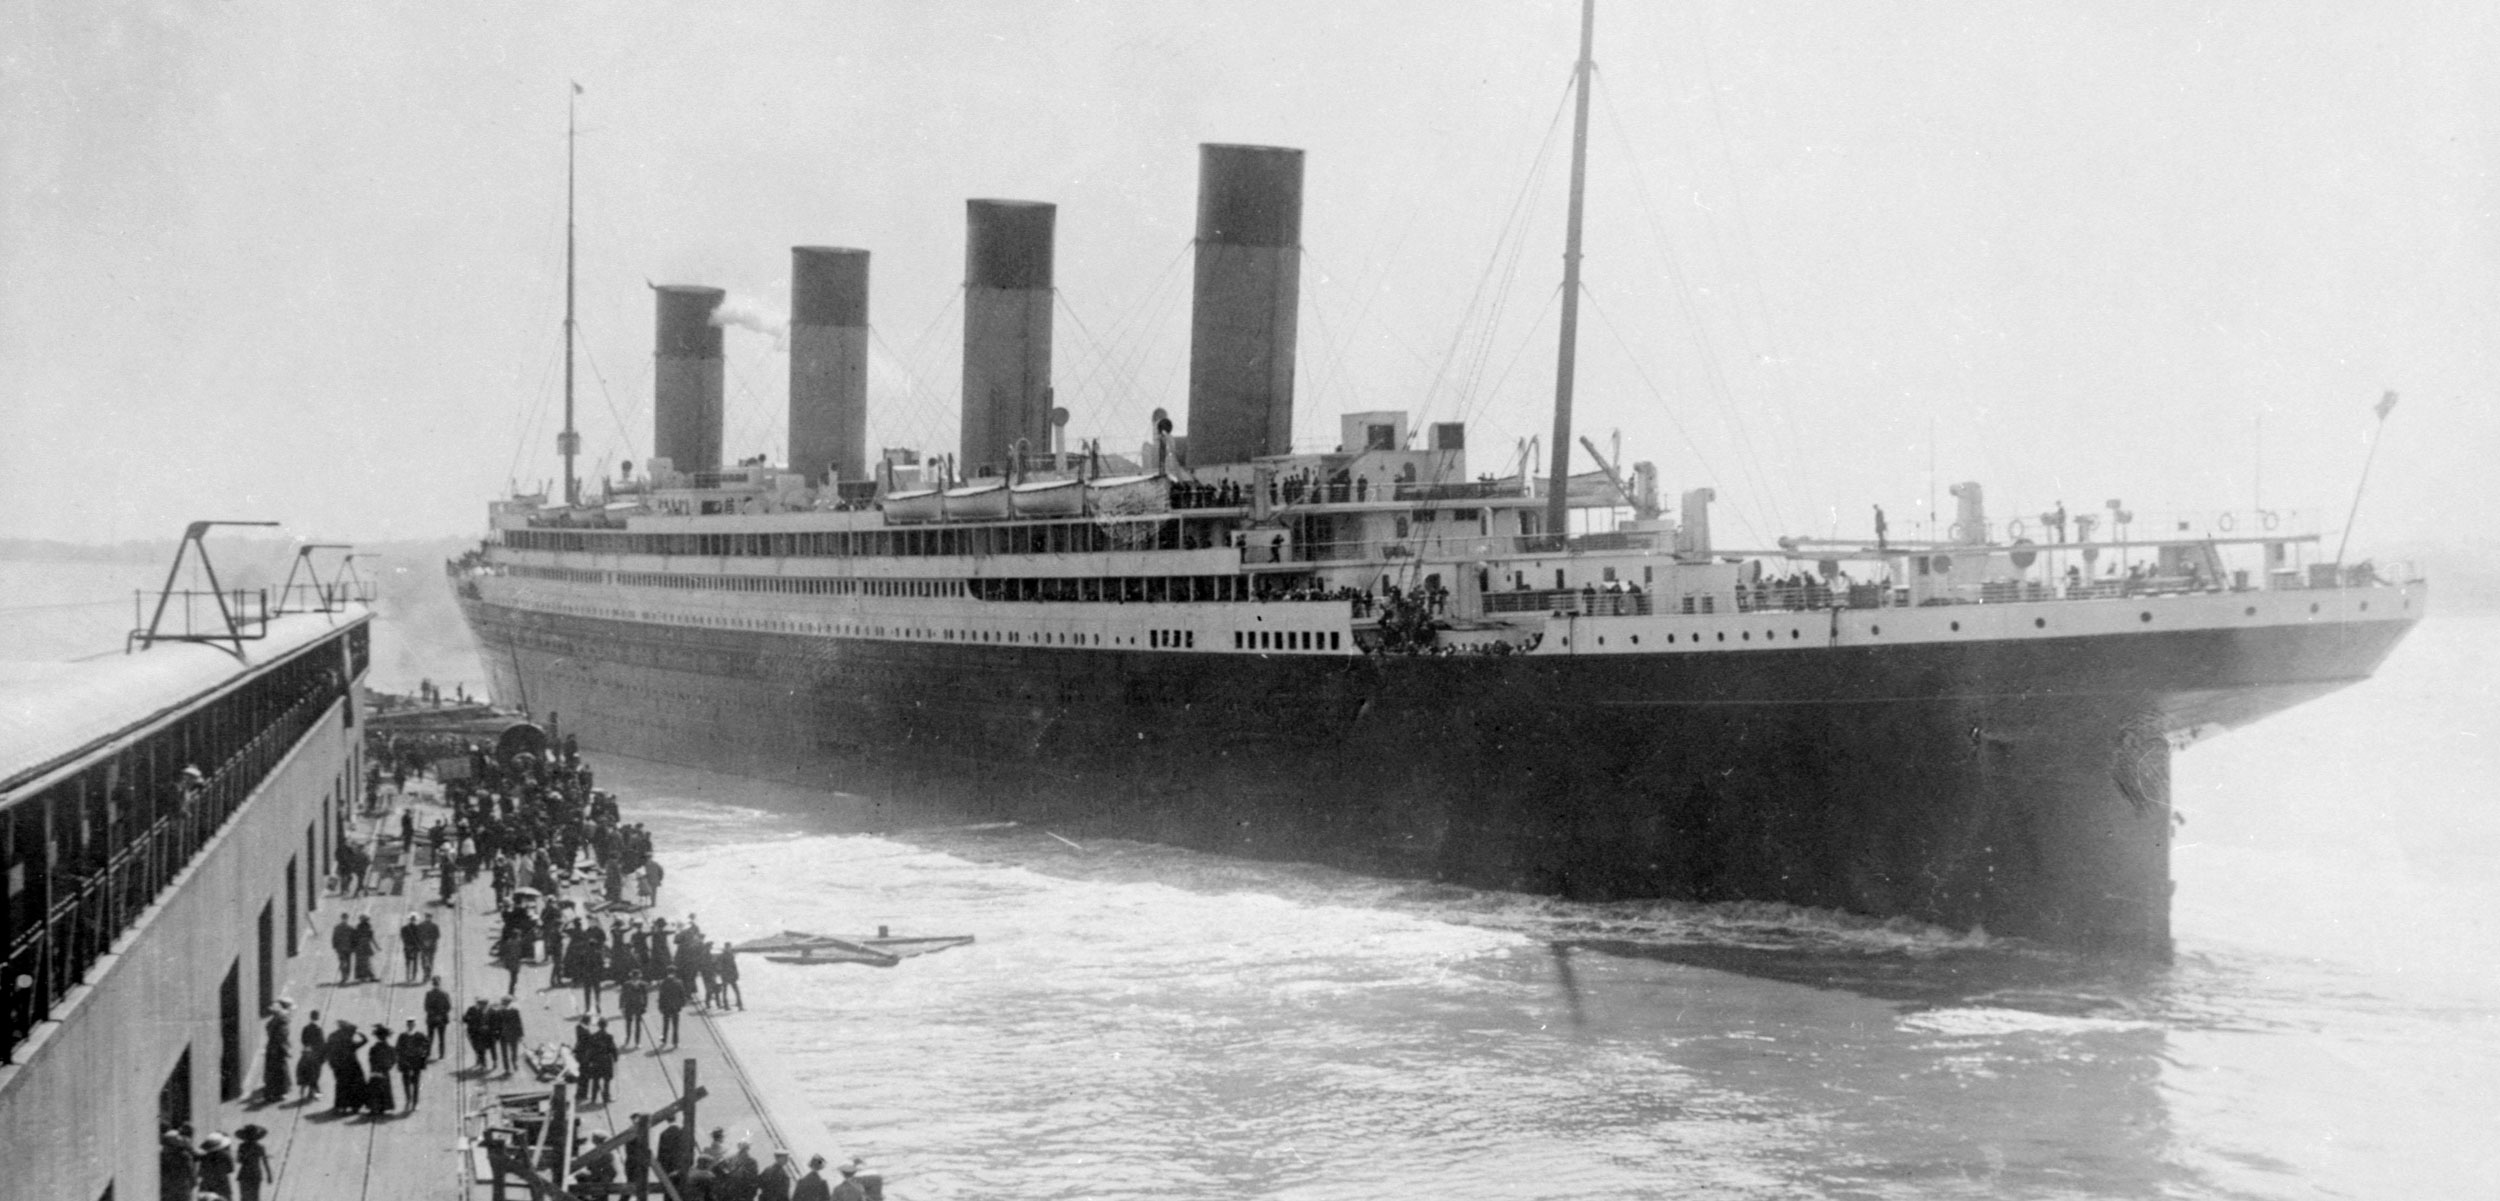

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Sex_num          0
dtype: int64

#Data Cleaning

In [ ]:
x=df['Age'].mean()
df['Age']=df['Age'].fillna(x)

In [ ]:
x

np.float64(29.637899159663863)

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

#Data Visualization

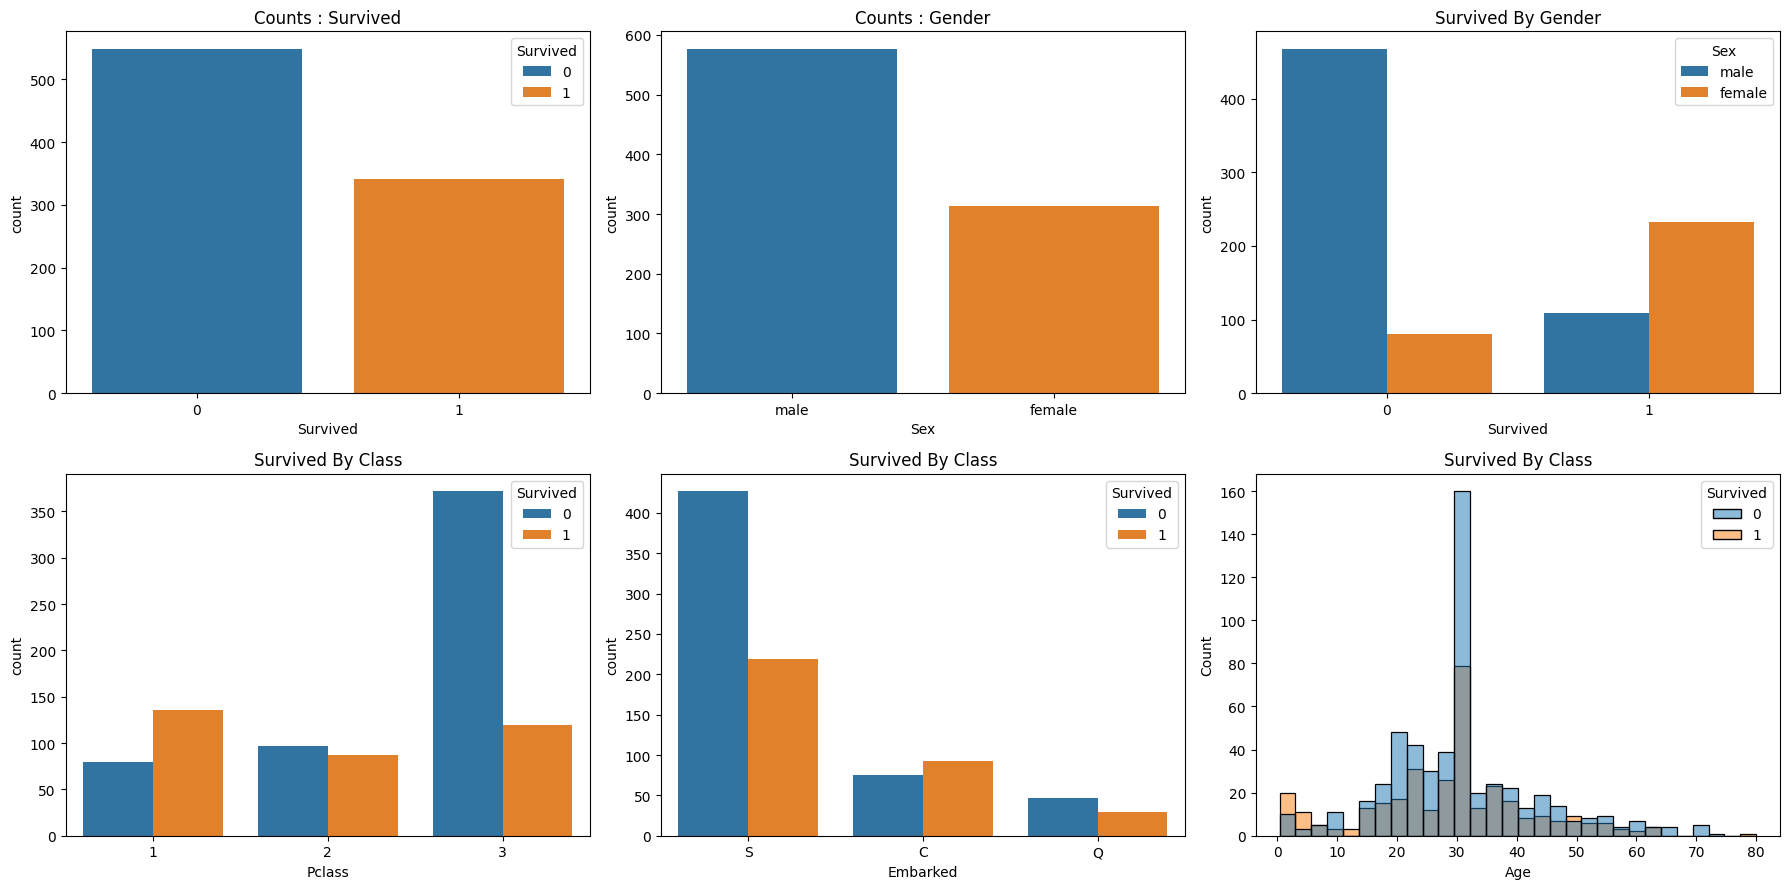

In [ ]:
fig,ax=plt.subplots(2,3 ,figsize=(18,9))

sns.countplot(data=df,x='Survived',hue='Survived',ax=ax[0,0])
ax[0,0].set_title('Counts : Survived')

sns.countplot(data=df,x='Sex',hue='Sex',ax=ax[0,1])
ax[0,1].set_title('Counts : Gender')

sns.countplot(data=df,x='Survived',hue='Sex',ax=ax[0,2])
ax[0,2].set_title('Survived By Gender')

sns.countplot(data=df,x='Pclass',hue='Survived',ax=ax[1,0])
ax[1,0].set_title('Survived By Class')

sns.countplot(data=df,x='Embarked',hue='Survived',ax=ax[1,1])
ax[1,1].set_title('Survived By Class')

sns.histplot(data=df,x='Age',hue='Survived',ax=ax[1,2])
ax[1,2].set_title('Survived By Class')

plt.tight_layout()
plt.show()

In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [ ]:
from ydata_profiling import ProfileReport

#Python Report

In [ ]:
profile=ProfileReport(df,title='Titanic EDA Report',explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 32.80it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#Outliers

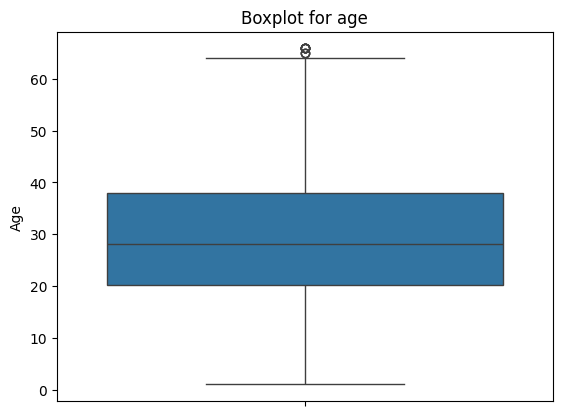

In [ ]:
sns.boxplot(data=df['Age'])
plt.title('Boxplot for age')
plt.show()

In [ ]:
def winsorize_fun(s,lower_q=0.01,upper_q=0.99):
  low,high=s.quantile(lower_q),s.quantile(upper_q)
  return s.clip(lower=low,upper=high)

In [ ]:
df['Age']=winsorize_fun(df['Age'])

In [ ]:
df['Sex_num']=df['Sex'].map({'female':1,'male':0})

In [ ]:
df['Survived'].corr(df['Sex_num'])

np.float64(0.5433513806577555)

In [ ]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.637899   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Cabin Embarked  Sex_num  
0        1      0         A/5 21171   7.2500   NaN        S        0  
1        1      0          PC 17599  71.2833   C85        C        1  
2        0      0  STON/O2. 3101282   7.9250   NaN        S        1  
3        1      0            113803  53.1000  C123        S        1  
4        0      0            373450   8.0500   NaN        S        0  
..     ...    ...               ...      ...   ...      ...      ...  
886      0      0            211536  13.0000   NaN        S        0  
887      0      0            112053  30.0000   B42        S        1  
888      1      2        W./C. 6607  23.4500   NaN        S        1  
889      0      0            111369  30.0000  C148        C        0  
890      0      0            370376   7.7500   NaN        Q        0  

[891 rows x 13 columns]

In [ ]:
df['Survived'].corr(df['PassengerId'])

np.float64(-0.005006660767066504)

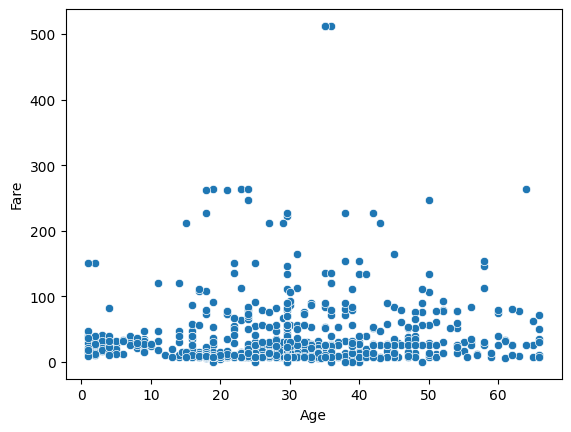

In [ ]:
sns.scatterplot(x=df['Age'], y=df['Fare'])
plt.show()

In [ ]:
df['Sex_num']=df['Sex'].map({'female':1,'male':0})
num_col=['Age','Fare','Sex_num','Pclass','SibSp']

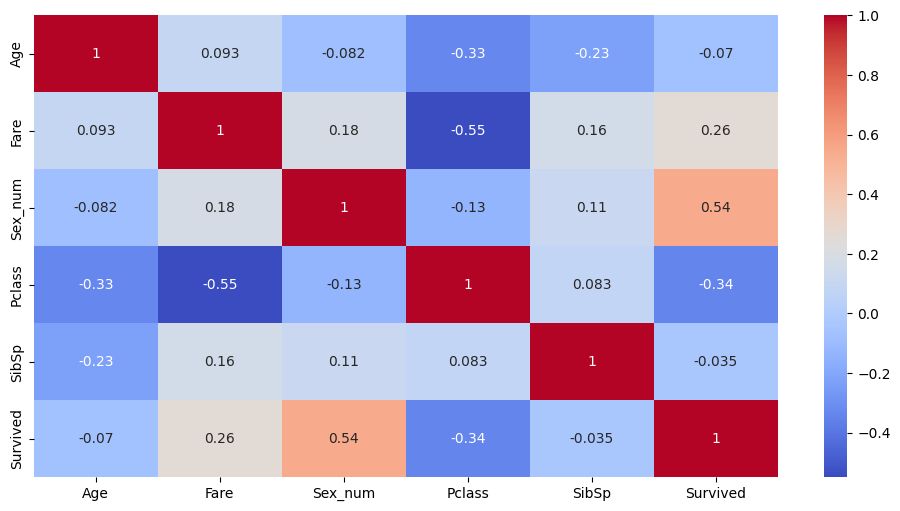

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_col+['Survived']].corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error

In [ ]:
x=df[['Pclass']]
y=df['Fare']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=55)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_test

713     9.4833
726    21.0000
262    79.6500
266    39.6875
186    15.5000
        ...   
151    66.6000
631     7.0542
723    13.0000
61     80.0000
192     7.8542
Name: Fare, Length: 179, dtype: float64

In [ ]:
y_pred

array([ 9.40501813, 41.39433724, 73.38365635,  9.40501813,  9.40501813,
        9.40501813,  9.40501813,  9.40501813,  9.40501813,  9.40501813,
        9.40501813, 73.38365635,  9.40501813,  9.40501813,  9.40501813,
        9.40501813,  9.40501813,  9.40501813, 73.38365635, 41.39433724,
       73.38365635,  9.40501813,  9.40501813,  9.40501813,  9.40501813,
       41.39433724, 73.38365635, 41.39433724,  9.40501813, 41.39433724,
        9.40501813, 41.39433724,  9.40501813, 73.38365635,  9.40501813,
        9.40501813,  9.40501813,  9.40501813, 41.39433724, 73.38365635,
       41.39433724,  9.40501813, 41.39433724, 73.38365635, 73.38365635,
        9.40501813, 73.38365635, 41.39433724,  9.40501813,  9.40501813,
       41.39433724, 41.39433724, 41.39433724,  9.40501813, 41.39433724,
        9.40501813,  9.40501813,  9.40501813, 41.39433724, 73.38365635,
        9.40501813, 73.38365635, 41.39433724,  9.40501813,  9.40501813,
       41.39433724,  9.40501813,  9.40501813, 41.39433724, 41.39

In [ ]:
y_test

172    11.1333
524     7.2292
452    27.7500
170    33.5000
620    14.4542
        ...   
388     7.7292
338     8.0500
827    37.0042
773     7.2250
221    13.0000
Name: Fare, Length: 179, dtype: float64

In [ ]:
mean_squared_error(y_test,y_pred)

1449.5134624251232

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  mean_squared_error,r2_score,accuracy_score

In [ ]:
x=df[['Pclass','Sex_num','Age','Fare']]
y=df['Survived']

In [ ]:
x_train,x_test,y_train,y_testt=train_test_split(x,y,test_size=0.2,random_state=123)

In [ ]:
model_l=LogisticRegression()

In [ ]:
model_l.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_p=model_l.predict(x_test)

In [ ]:
y_p

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

In [ ]:
y_testt

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [ ]:
r2_score(y_p,y_testt)

0.14877717391304324

In [ ]:
accuracy_score(y_p,y_testt)

0.8044692737430168

In [ ]:
test=pd.DataFrame({'Pclass':3,
                   'Sex_num':0,
                   'Age':50,
                   'Fare':2}, index=[0])
y_p=model_l.predict(test)

In [ ]:
y_p

array([0])